## 1. Загрузка данных

    1. Все изображения извлечены из архива при помощи кода Python и сохранены в директорию images с поддиректориями train, test, valid, каждая из которых содержит каталоги по классу изображения (показания = классы) также при помощи средств Python

In [131]:
import os
import shutil

In [139]:
def extract_archive(archive_path):
    # Определяем путь к директории, куда будет распакован архив
    target_dir = os.path.dirname(archive_path)  # Распаковываем в ту же директорию, где находится архив
    
    # Временная директория для распаковки
    temp_dir = os.path.join(target_dir, 'temp_extract')
    
    try:
        # Распаковываем архив во временную директорию
        shutil.unpack_archive(archive_path, temp_dir)
        
        # Получаем список содержимого временной директории
        contents = os.listdir(temp_dir)
        
        # Проверяем, есть ли одна главная папка (например, Gauge_big)
        if len(contents) == 1 and os.path.isdir(os.path.join(temp_dir, contents[0])):
            main_folder = os.path.join(temp_dir, contents[0])
            
            # Переименовываем главную папку в 'images'
            images_dir = os.path.join(target_dir, 'images')
            if os.path.exists(images_dir):
                shutil.rmtree(images_dir)  # Удаляем старую папку images, если она существует
            
            shutil.move(main_folder, images_dir)
            print(f"Архив успешно распакован директорию '{images_dir}'.")
        else:
            print("В архиве не найдено ровно одной главной папки.")
        
        # Удаляем временную директорию
        shutil.rmtree(temp_dir)
    
    except Exception as e:
        print(f"Ошибка при распаковке или обработке архива: {e}")


In [140]:
archive_path = 'Gauge.zip'
extract_archive(archive_path)

Архив успешно распакован директорию 'images'.


## 2. Предварительная обработка

    1. Реализована функция, которая выполняет следующие операции:
    2. Загружает изображение из исходной директории
    3. Выполняет преобразование размера, приводя его к формату 224х224х3
    4. Выполняет преобразование в оттенки серого
    5. Сохраняет изображение в директорию preprocessed_images с соответствующими поддиректориями с тем же именем.


In [141]:
import os
from PIL import Image

In [142]:

def process_images(input_dir, output_dir="preprocessed_images", max_count=0):
    """
    Функция находит файлы в указанной папке, изменяет их размер до 224x224,
    преобразует в оттенки серого и сохраняет результат в указанную директорию
    с сохранением структуры поддиректорий.

    :param directory: Путь к папке, в которой нужно найти файлы.
    :param input_dir: Исходная директория, где находятся изображения.
    :param output_dir: Директория для сохранения обработанных изображений.
    :param max_count: Максимальное количество файлов для обработки. Если 0, обрабатываются все файлы.
    :return: Список путей к сохраненным изображениям.
    """
    if not os.path.isdir(input_dir):
        raise ValueError(f"Указанный путь '{input_dir}' не является директорией.")

    file_paths = []
    for root, _, files in os.walk(input_dir):
        for file in files:
            # Если max_count != 0 и достигнуто ограничение, прекращаем поиск
            if max_count > 0 and len(file_paths) >= max_count:
                break
            file_paths.append(os.path.join(root, file))
        if max_count > 0 and len(file_paths) >= max_count:
            break

    # Обрезаем список файлов до max_count, если max_count > 0
    if max_count > 0:
        file_paths = file_paths[:max_count]

    processed_files = []
    
    for file_path in file_paths:
        # Вычисляем относительный путь файла относительно input_dir
        relative_path = os.path.relpath(file_path, input_dir)

        try:
            # Полный путь к исходному изображению
            full_input_path = os.path.join(input_dir, relative_path)

            # Проверяем, существует ли файл
            if not os.path.isfile(full_input_path):
                raise FileNotFoundError(f"Файл не найден: {full_input_path}")

            # Открываем изображение
            img = Image.open(full_input_path)

            # Изменяем размер изображения до 224x224
            img_resized = img.resize((224, 224))

            # Преобразуем изображение в оттенки серого
            img_gray = img_resized.convert("L")

            # Создаем путь для сохранения изображения
            output_path = os.path.join(output_dir, relative_path)

            # Создаем директории, если они не существуют
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            # Сохраняем изображение
            img_gray.save(output_path)

            processed_files.append(output_path)
        except Exception as e:
            print(f"Ошибка при обработке файла {file_path}: {e}")

    return processed_files

In [143]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [144]:
import os
import cv2

In [145]:


def process_images2(input_dir, output_dir="preprocessed_images", max_count=0):
    """ Функция находит файлы в указанной папке, изменяет их размер до 224x224, преобразует в оттенки серого и сохраняет результат в указанную директорию с сохранением структуры поддиректорий. :param input_dir: Исходная директория, где находятся изображения. :param output_dir: Директория для сохранения обработанных изображений. :param max_count: Максимальное количество файлов для обработки. Если 0, обрабатываются все файлы. :return: Список путей к сохраненным изображениям. """
    if not os.path.isdir(input_dir):
        raise ValueError(f"Указанный путь '{input_dir}' не является директорией.")

    file_paths = []
    for root, _, files in os.walk(input_dir):
        for file in files:
            # Если max_count != 0 и достигнуто ограничение, прекращаем поиск
            if max_count > 0 and len(file_paths) >= max_count:
                break
            file_paths.append(os.path.join(root, file))
        if max_count > 0 and len(file_paths) >= max_count:
            break

    # Обрезаем список файлов до max_count, если max_count > 0
    if max_count > 0:
        file_paths = file_paths[:max_count]

    processed_files = []
    
    for file_path in file_paths:
        # Вычисляем относительный путь файла относительно input_dir
        relative_path = os.path.relpath(file_path, input_dir)

        try:
            # Полный путь к исходному изображению
            full_input_path = os.path.join(input_dir, relative_path)

            # Проверяем, существует ли файл
            if not os.path.isfile(full_input_path):
                raise FileNotFoundError(f"Файл не найден: {full_input_path}")

            # Читаем изображение в оттенках серого
            img = cv2.imread(full_input_path, cv2.IMREAD_GRAYSCALE)
            
            # Изменяем размер изображения до 224x224
            img_resized = cv2.resize(img, (224, 224))

            # Создаем путь для сохранения изображения
            output_path = os.path.join(output_dir, relative_path)

            # Создаем директории, если они не существуют
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            # Сохраняем изображение
            cv2.imwrite(output_path, img_resized)

            processed_files.append(output_path)
        except Exception as e:
            print(f"Ошибка при обработке файла {file_path}: {e}")

    return processed_files

## 3. Функция предобработки применена ко всем изображениям

In [146]:
processed = process_images(input_dir="images", output_dir="preprocessed_images1", max_count=0)

In [147]:
processed = process_images2(input_dir="images", output_dir="preprocessed_images", max_count=0)

Сделал 2 метода. Потому что через Pillow было медленно (почти 7 минут). OpenCV с этим справился быстрее(50 сек)

## 4.  Для расширения датасета реализована функция, которая:

    1. Принимает на вход путь к файлу-изображению
    2. Выполняет поворот вокруг центра изображения на случайный градус (от -15 до +15). Полученное изображение сохраняется в ту же папку с индексом в имени файла ‘_tilted’
    3. Выполняет вырезание случайной области из изображения (добавление черного прямоугольника), размеры каждой из сторон прямоугольника случайны в диапазоне от 20 до 50 пикселей. Операция выполняется над исходных (а не аугментированном) изображении. Полученное изображение сохраняется в ту же папку с индексом в имени файла ‘_corrupted’
    4. В случае вызова функции с атрибутом show_results = True, функция должна помимо выполнения аугментаций также вывести график с тремя полотнами, где наглядно будут продемонстрированы исходное изображение и изображение с каждой из двух аугментаций. Сохранять аугментированные изображения при данном значении аргумента не нужно.
    Значение параметра по умолчанию – False. При show_results = False результаты должны сохраняться на диск, как было описано в п.2 и 3
    5. В случае, если функция вызывается с передачей пути, а в данной директории уже есть файлы ‘_tilted’ и ‘_corrupted’, функция не должна выполнять аугментации повторно, вместо этого она должна вывести в консоль сообщение с предупреждением
    6. Аугментация изображений не должна изменять их размер в пикселях!



In [148]:
import os
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [149]:
def process_image(image_path, show_results=False):

    img_orig = Image.open(image_path)

    # Открываем изображение
    with Image.open(image_path) as img:
        # Получаем размеры изображения
        width, height = img.size

        # Генерируем случайный угол поворота от -15 до +15 градусов
        angle = random.uniform(-15, 15)
        
        # Поворачиваем изображение
        tilted_img = img.rotate(angle, expand=False)

        # Генерируем случайный размер прямоугольника
        rect_width = random.randint(20, 50)
        rect_height = random.randint(20, 50)

        # Генерируем случайные координаты для верхнего левого угла прямоугольника
        x = random.randint(0, width - rect_width)
        y = random.randint(0, height - rect_height)

        # Создаем черный прямоугольник
        draw = ImageDraw.Draw(img)
        draw.rectangle([x, y, x + rect_width, y + rect_height], fill="black")

        # Формируем имена файлов для сохранения
        base_name, ext = os.path.splitext(image_path)
        
        if show_results:
            # Создаем график с тремя полотнами
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            
            # Выводим исходное изображение
            axs[0].imshow(img_orig)
            axs[0].set_title("Исходное изображение")

            # Выводим изображение с поворотом
            axs[1].imshow(tilted_img)
            axs[1].set_title("Поворот (градусов: {:.2f})".format(angle))

            # Выводим изображение с черным прямоугольником
            axs[2].imshow(img)
            axs[2].set_title("Черный прямоугольник")
            
            # Добавляем легенду
            plt.tight_layout()
            plt.show()
        else:
            base_corrupted_file = base_name + "_corrupted" + ext
            base_tilted_file = base_name + "_tilted" + ext
            if not os.path.exists(base_corrupted_file):
                img.save(base_corrupted_file)
            else:
                print(f"_corrupted файл уже существует. НЕ СОХРАНЯЕМ")

            if not os.path.exists(base_tilted_file):
                tilted_img.save(base_tilted_file)
            else:
                print(f"_tilted файл уже существует. НЕ СОХРАНЯЕМ")
            

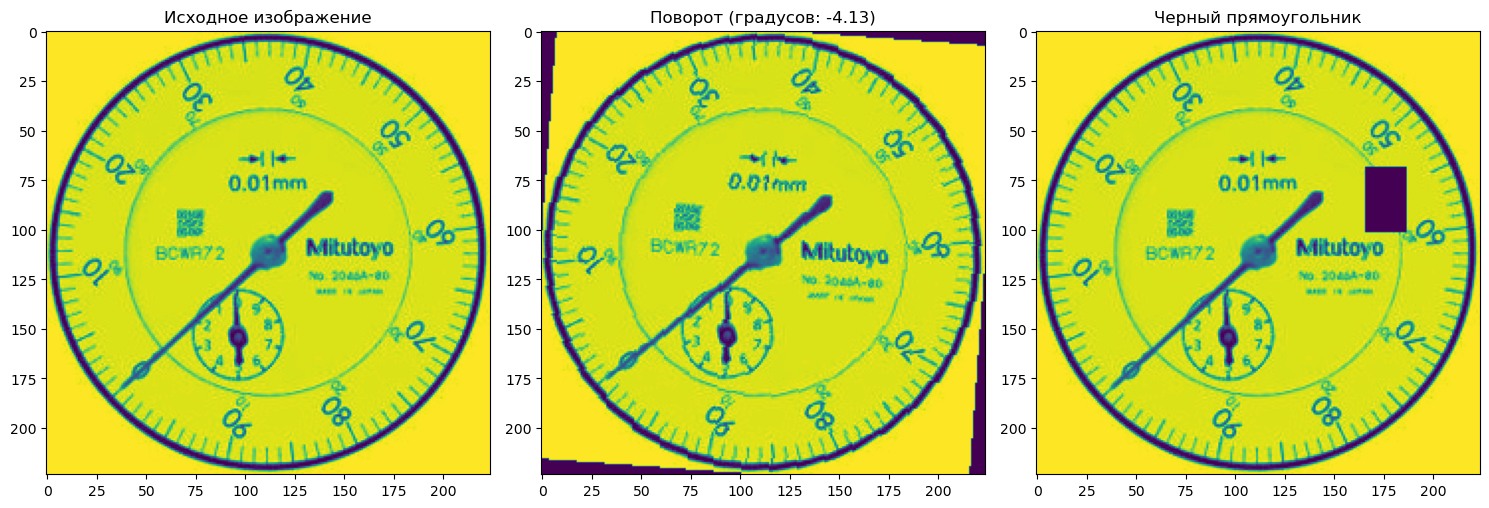

In [150]:
process_image("/home/c6/new_main_venv/preprocessed_images/test/0-00/gauge_rotated_7_jpg.rf.3deee732ce0baff5a136fafaabde01aa.jpg", show_results=True)

2 раза запущена функция. Первый раз создает файлы. Второй раз уже нет

In [154]:
process_image("/home/c6/new_main_venv/preprocessed_images/test/0-44/gauge_rotated_9_jpg.rf.cbfdbfa4ef625c169c78022df8b50eb5.jpg", show_results=False)

In [155]:
process_image("/home/c6/new_main_venv/preprocessed_images/test/0-44/gauge_rotated_9_jpg.rf.cbfdbfa4ef625c169c78022df8b50eb5.jpg", show_results=False)

_corrupted файл уже существует. НЕ СОХРАНЯЕМ
_tilted файл уже существует. НЕ СОХРАНЯЕМ


## 5. Выполнение аугментаций

    1. Реализованная функция применена к ОДНОМУ изображению для КАЖДОГО КЛАССА в папке preprocessed_images/train. В результате для каждого класса кол-во экземпляров должно увеличиться с 21 до 23.


In [156]:
def process_images_one_in_all(base_dir="preprocessed_images/train"):
    # Проходим по каждой папке (классу) в базовой директории
    for class_dir in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_dir)

        # Убедимся, что мы имеем дело с директорией
        if os.path.isdir(class_path):
            # Находим все файлы в папке класса
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

            # Если есть хотя бы одно изображение, обрабатываем первое
            if image_files:
                # Берем первое изображение
                first_image_path = os.path.join(class_path, image_files[0])
                # Применяем функцию обработки к изображению
                process_image(first_image_path, show_results=False)
            #print(class_path)

In [158]:
process_images_one_in_all()

    2. Продемонстрирован (минимум на двух примерах) функционал отрисовки графиков с аугментациями при передаче параметра show_results = True

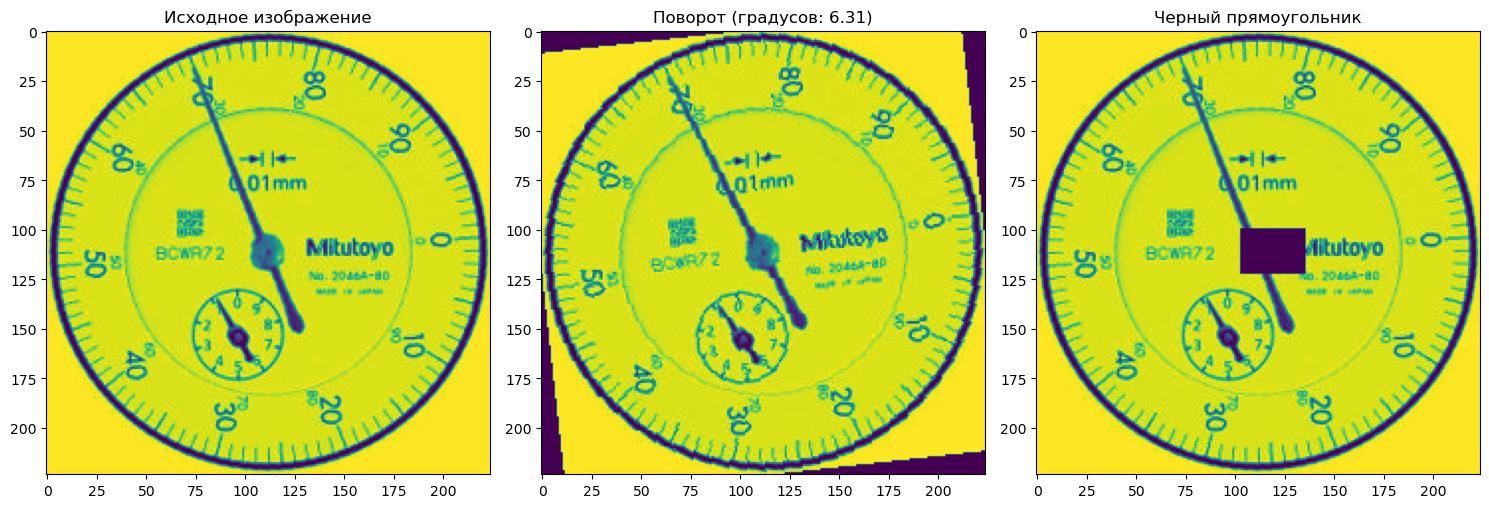

In [159]:
process_image("/home/c6/new_main_venv/preprocessed_images/train/0-70/gauge_rotated_2_jpg.rf.6bb37616b4570a47d6c795076273f695.jpg", show_results=True)

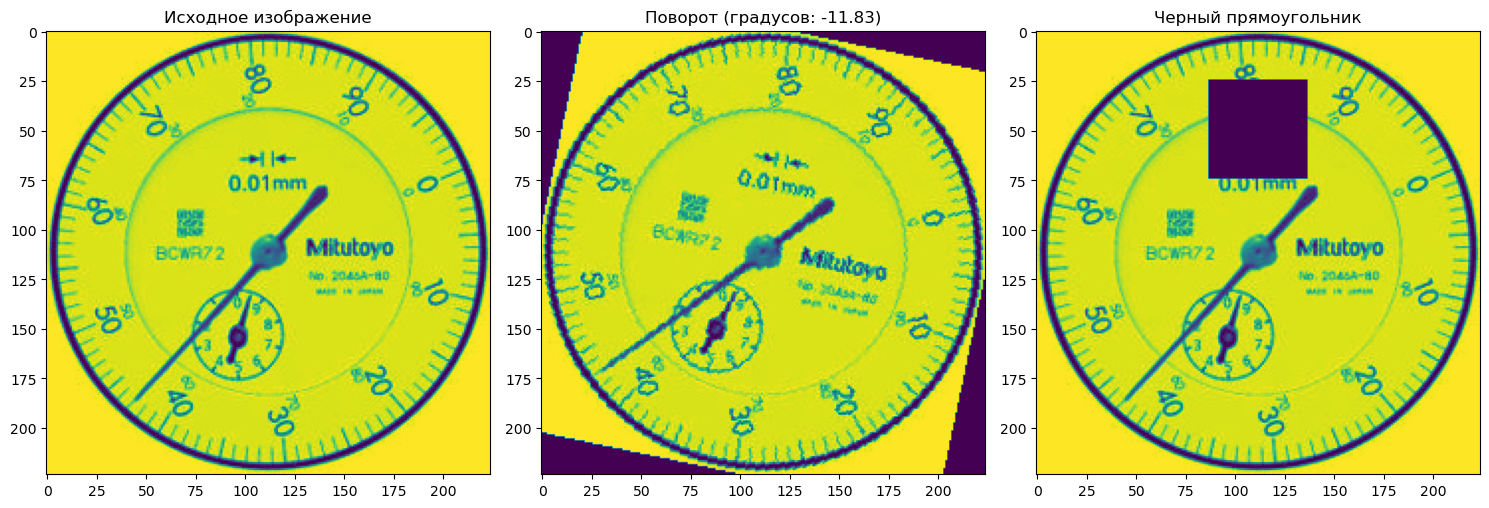

In [160]:
process_image("/home/c6/new_main_venv/preprocessed_images/train/9-43/gauge_rotated_1_jpg.rf.ea800a512bae00887a2c405a5c871ca8.jpg", show_results=True)

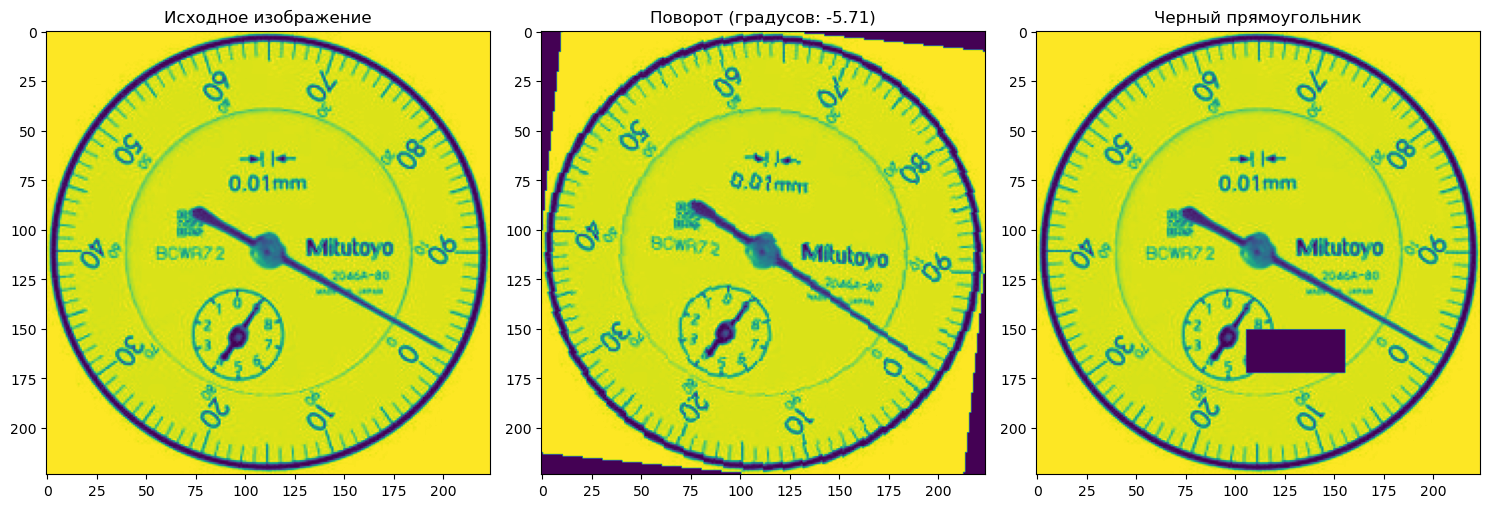

In [161]:
process_image("/home/c6/new_main_venv/preprocessed_images/train/8-98/gauge_rotated_1_jpg.rf.a4eea00f6f46cc7161ecb23a7218be90.jpg", show_results=True)

    3. Продемонстрирован функционал защиты от повторной аугментации

In [162]:
process_image("/home/c6/new_main_venv/preprocessed_images/test/0-01/gauge_rotated_8_jpg.rf.c79b3195e27a0b0d39a1b078f8e80ce3.jpg", show_results=False)

_corrupted файл уже существует. НЕ СОХРАНЯЕМ
_tilted файл уже существует. НЕ СОХРАНЯЕМ


## 6.  Формирование итогового датасета

    1. Должен быть сформирован итоговый датасет, содержащий 23000 изображений для обучающей выборки, 1000 для тестовой и 2000 для валидационной. 


In [163]:
processed = process_images2(input_dir="images", output_dir="preprocessed_images3", max_count=0)

In [164]:
process_images_one_in_all('preprocessed_images3/test')

In [165]:
process_images_one_in_all('preprocessed_images3/train')

In [166]:
process_images_one_in_all('preprocessed_images3/val')

In [167]:
import os
import shutil

In [168]:
def copy_images(input_directory, output_directory, num_images):
    # Создаем выходную директорию, если она не существует
    os.makedirs(output_directory, exist_ok=True)

    # Список для хранения найденных изображений
    image_files = []
    # Расширения файлов изображений
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

    # Проходим по всем подкаталогам и файлам в указанной директории
    for root, dirs, files in os.walk(input_directory):
        for file in files:
            # Проверяем, является ли файл изображением по его расширению
            if file.lower().endswith(valid_extensions):
                image_files.append(os.path.join(root, file))
            # Если уже собрали достаточное количество изображений, выходим из цикла
            if len(image_files) >= num_images:
                break
        if len(image_files) >= num_images:
            break

    # Копируем найденные изображения в целевую директорию
    for image in image_files[:num_images]:  # Копируем только указанное количество
        shutil.copy(image, output_directory)

    print(f'Скопировано {len(image_files[:num_images])} изображений в {output_directory}')

# Пример использования функции


23000 изображений для обучающей выборки

In [169]:
# Пример использования функции
copy_images('preprocessed_images3/train', 'temp_dir/train', 23000)

Скопировано 23000 изображений в temp_dir/train


1000 для тестовой

In [170]:
copy_images('preprocessed_images3/test', 'temp_dir/test', 1000)

Скопировано 1000 изображений в temp_dir/test


2000 для валидационной

In [171]:
copy_images('preprocessed_images3/val', 'temp_dir/val', 2000)

Скопировано 2000 изображений в temp_dir/val


    2. Итоговый датасет должен быть сохранен в файл preprocessed_images.zip

In [172]:
def zip_folder(folder_name):
    # Проверяем, существует ли директория
    if not os.path.exists(folder_name):
        print(f"Директория '{folder_name}' не существует.")
        return

    # Формируем имя для выходного ZIP файла
    zip_file_name = 'preprocessed_images.zip'

    # Удаляем файл, если он уже существует
    if os.path.exists(zip_file_name):
        os.remove(zip_file_name)

    # Создаем архив
    shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', folder_name)

    print(f"Архив '{zip_file_name}' успешно создан.")

In [173]:
zip_folder('temp_dir')

Архив 'preprocessed_images.zip' успешно создан.


    3. Отчет должен содержать струкурную схему датасета в свободном формате.

In [174]:
def print_directory_structure(path, indent=0, is_last=True, prefix="", show_files_limit=6):
    # Проверяем, существует ли указанный путь
    if not os.path.exists(path):
        print(f"Путь '{path}' не существует.")
        return

    # Получаем список всех элементов в директории
    try:
        items = os.listdir(path)
    except PermissionError:
        print(prefix + '└── Доступ запрещен к этой папке.')
        return

    files = [item for item in items if os.path.isfile(os.path.join(path, item))]
    dirs = [item for item in items if os.path.isdir(os.path.join(path, item))]

    # Выводим название директории с отступами и количеством файлов в ней
    connector = "└── " if is_last else "├── "
    print(prefix + connector + f"{os.path.basename(path)}/ ({len(files)} файлов)")

    # Обновляем префикс для вложенных элементов
    if is_last:
        new_prefix = prefix + "    "
    else:
        new_prefix = prefix + "│   "

    # Обрабатываем директории
    for i, directory in enumerate(dirs):
        is_last_dir = (i == len(dirs) - 1) and (len(files) == 0)
        print_directory_structure(os.path.join(path, directory), indent + 4, is_last_dir, new_prefix)

    # Обрабатываем файлы
    if len(files) > show_files_limit:
        # Если в папке больше 6 файлов, отображаем первые и последние 3 файла
        print(new_prefix + "└── ... (еще {0} файлов)".format(len(files) - 6))
        for file in files[:3]:
            print(new_prefix + "    ├── " + file)
        if len(files) > 6:  # Если больше 6 файлов, показываем последние 3
            for file in files[-3:]:
                print(new_prefix + "    ├── " + file)
    else:
        for i, file in enumerate(files):
            connector = "└── " if (i == len(files) - 1) else "├── "
            print(new_prefix + connector + file)

In [175]:
print_directory_structure('temp_dir')

└── temp_dir/ (0 файлов)
    ├── val/ (2000 файлов)
    │   └── ... (еще 1994 файлов)
    │       ├── gauge_rotated_8_jpg.rf.52de95c6ee37e76cba6067cf7dbc0978.jpg
    │       ├── gauge_rotated_6_jpg.rf.44957ccbc3313b293d17c2e484121fd0_tilted.jpg
    │       ├── gauge_rotated_4_jpg.rf.b420aa7c4c381fe1f803d8a554ffedbe_tilted.jpg
    │       ├── gauge_rotated_4_jpg.rf.9e145bf6ea1d3087a608dcf5fe00860a.jpg
    │       ├── gauge_rotated_9_jpg.rf.061d5b41eb033121ece151244a3cea18_corrupted.jpg
    │       ├── gauge_rotated_7_jpg.rf.2280f045bf6653c59688f9b2cd02c23c_corrupted.jpg
    ├── train/ (23000 файлов)
    │   └── ... (еще 22994 файлов)
    │       ├── gauge_rotated_5_jpg.rf.0d3cf1e821bfcd3d9d9dc40698b16d02.jpg
    │       ├── gauge_rotated_6_jpg.rf.6034d0be22c25987f194cf20a5253945.jpg
    │       ├── gauge_rotated_6_jpg.rf.e037fc93c4b9362d1a18b4a683ae31d7.jpg
    │       ├── gauge_rotated_1_jpg.rf.9e6547b74ae5bc4708d799e0fe737f7b.jpg
    │       ├── gauge_rotated_3_jpg.rf.4fcfd06f3bd484c0